In [ ]:
!pip install scanpy decoupler omnipath anndata


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 101.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha256=f67a56637a2f1a30b76150006e6c3f1c5597882aae2446865fa13acff437fe9f
  Stored in directo

In [ ]:
import scanpy as sc
adata = sc.read_h5ad("/bone_marrow_15.h5ad")
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
!wget -O result.txt "http://www.ensembl.org/biomart/martservice?query=<?xml version='1.0' encoding='UTF-8'?><!DOCTYPE Query><Query virtualSchemaName='default' formatter='CSV' header='0' uniqueRows='0' count='' datasetConfigVersion='0.6'><Dataset name='hsapiens_gene_ensembl' interface='default'><Attribute name='ensembl_gene_id'/><Attribute name='external_gene_name'/></Dataset></Query>"


--2025-12-03 23:44:46--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version='1.0'%20encoding='UTF-8'?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20virtualSchemaName='default'%20formatter='CSV'%20header='0'%20uniqueRows='0'%20count=''%20datasetConfigVersion='0.6'%3E%3CDataset%20name='hsapiens_gene_ensembl'%20interface='default'%3E%3CAttribute%20name='ensembl_gene_id'/%3E%3CAttribute%20name='external_gene_name'/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [      <=>           ]   1.71M  1.43MB/s    in 1.2s    

2025-12-03 23:44:47 (1.43 MB/s) - ‘result.txt’ saved [1795328]



In [ ]:
import pandas as pd
ensembl_var = pd.read_csv('result.txt', header=None)
ensembl_var.columns = ['ensembl_gene_id', 'gene_name']
ensembl_var.head()

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV
3,ENSG00000210082,MT-RNR2
4,ENSG00000209082,MT-TL1


In [ ]:
import decoupler as dc

markers = dc.op.resource(name="PanglaoDB", organism="human")

# Remove duplicates
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Rename
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]
markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [ ]:
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
markers = markers.dropna()

markers = markers.rename(columns={"ensembl_gene_id": "target"})
markers = markers[["source", "target"]]
markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [ ]:
import numpy as np

adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# Filter cells and genes
adata = adata[adata.obs["pct_counts_mt"] < 10]  # remove dying cells
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


In [ ]:
adata.raw = adata # Store raw data before normalization and log-transformation
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
adata = adata[:, adata.var["highly_variable"]]

/usr/local/lib/python3.12/dist-packages/legacy_api_wrap/__init__.py:88: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)


In [ ]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata)

sc.pp.neighbors(adata, n_pcs=30)
sc.tl.leiden(adata, resolution=0.5)
sc.tl.umap(adata)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/tmp/ipython-input-3035806251.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


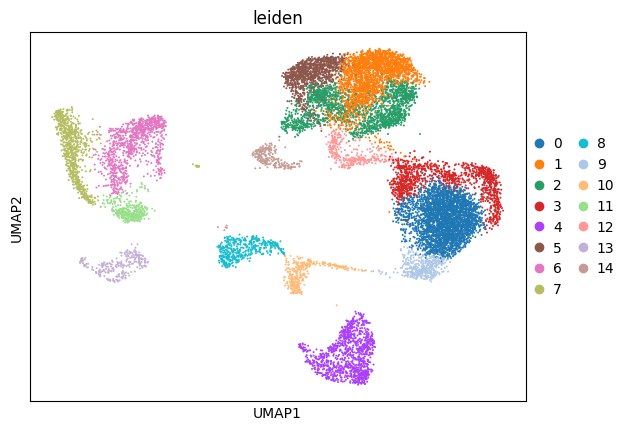

In [ ]:
sc.pl.umap(adata, color="leiden")

/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:484: 

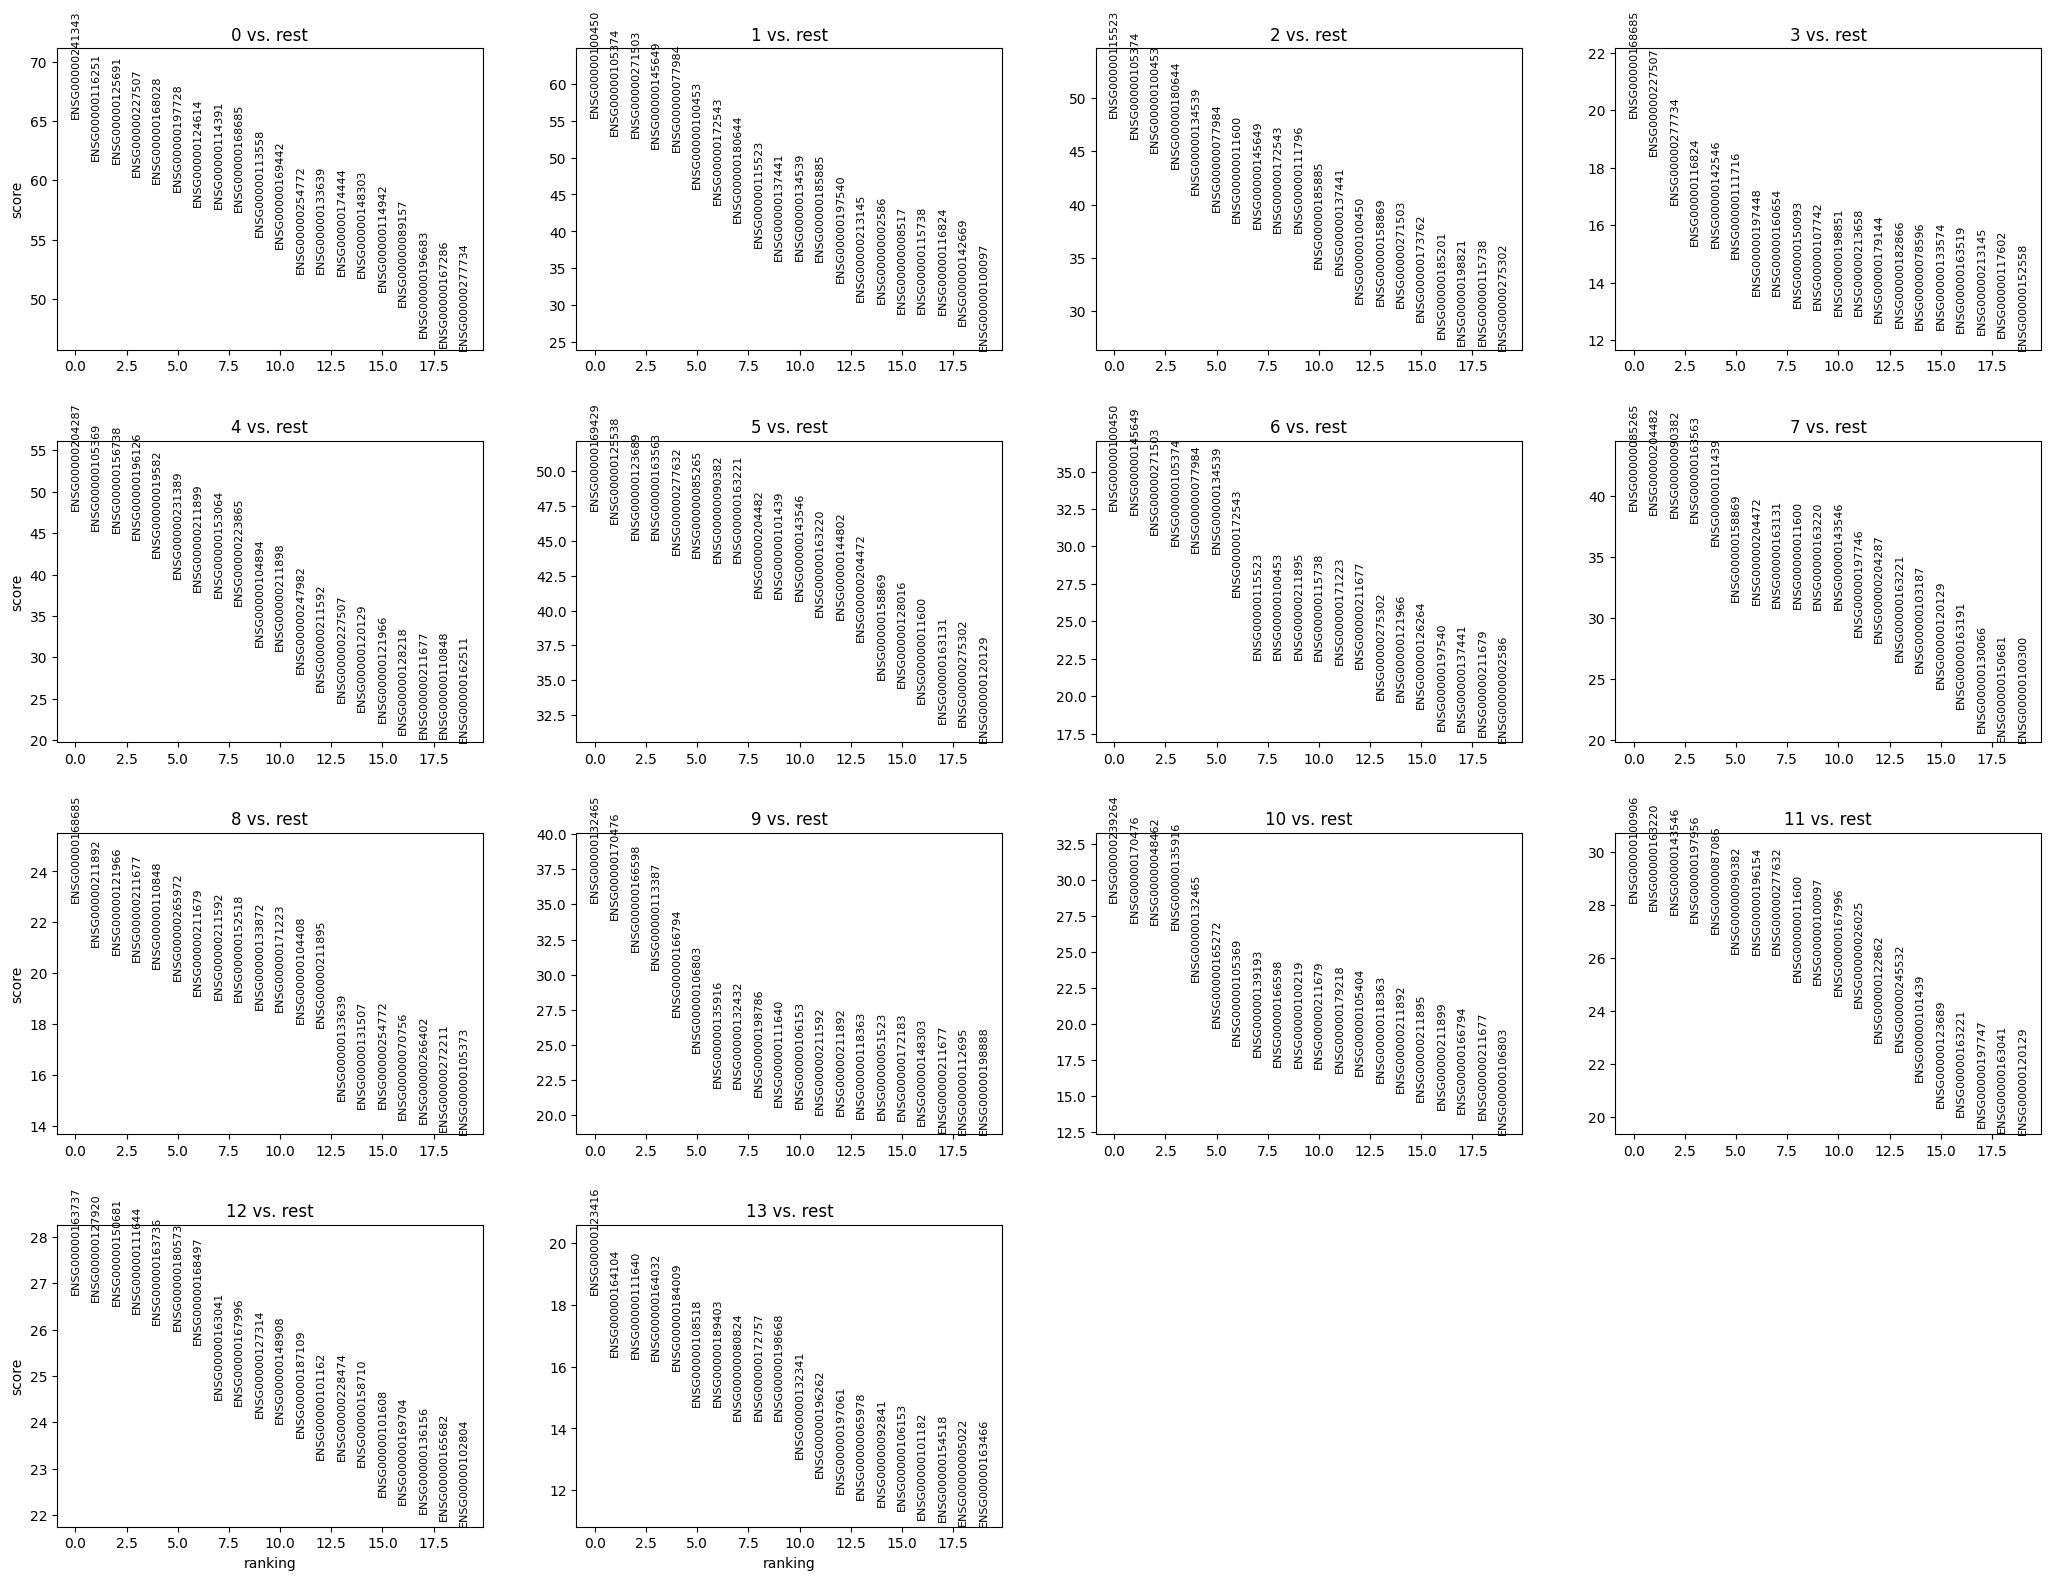

In [ ]:
import scanpy as sc
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
adata.var["ensembl"] = adata.var_names.str.replace(r"\.\d+", "", regex=True)

panglao_dict = markers.groupby("source")["target"].apply(set).to_dict()

cluster_annotations = {}

for cluster in adata.obs["leiden"].cat.categories:
    genes = sc.get.rank_genes_groups_df(adata, group=cluster).names[:50]
    ens = set(adata.var.loc[genes, "ensembl"])

    scores = []
    for ct, markerset in panglao_dict.items():
        overlap = len(ens & markerset)
        if overlap > 0:
            scores.append((ct, overlap))

    scores.sort(key=lambda x: x[1], reverse=True)
    cluster_annotations[cluster] = scores[:3]

cluster_annotations

{'0': [('T cells', 7), ('T memory cells', 6), ('B cells', 4)],
 '1': [('NK cells', 19), ('T cells', 16), ('Gamma delta T cells', 11)],
 '2': [('NK cells', 18), ('Gamma delta T cells', 13), ('T cells', 10)],
 '3': [('T memory cells', 14), ('T cells', 13), ('NK cells', 4)],
 '4': [('B cells', 22), ('B cells naive', 18), ('Plasma cells', 13)],
 '5': [('Monocytes', 13), ('Dendritic cells', 8), ('Microglia', 6)],
 '6': [('NK cells', 18), ('T cells', 14), ('Gamma delta T cells', 10)],
 '7': [('Dendritic cells', 10), ('Monocytes', 10), ('Macrophages', 4)],
 '8': [('B cells', 8), ('Plasma cells', 7), ('T cells', 5)],
 '9': [('Plasma cells', 9),
  ('B cells', 7),
  ('Plasmacytoid dendritic cells', 3)],
 '10': [('Plasma cells', 14), ('B cells', 11), ('B cells memory', 5)],
 '11': [('Monocytes', 11), ('Dendritic cells', 9), ('Macrophages', 6)],
 '12': [('Platelets', 19), ('Endothelial cells', 5), ('Megakaryocytes', 3)],
 '13': [('Gamma delta T cells', 3),
  ('Alveolar macrophages', 1),
  ('Cardio

In [ ]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.9 MB/s eta 0:00:00


In [ ]:
!pip install python-igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 49.1 MB/s eta 0:00:00


In [ ]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 4.1 MB/s eta 0:00:00


In [ ]:
cluster_annotations


{'0': [('T cells', 7), ('T memory cells', 6), ('B cells', 4)],
 '1': [('NK cells', 19), ('T cells', 16), ('Gamma delta T cells', 11)],
 '2': [('NK cells', 18), ('Gamma delta T cells', 13), ('T cells', 10)],
 '3': [('T memory cells', 14), ('T cells', 13), ('NK cells', 4)],
 '4': [('B cells', 22), ('B cells naive', 18), ('Plasma cells', 13)],
 '5': [('Monocytes', 13), ('Dendritic cells', 8), ('Microglia', 6)],
 '6': [('NK cells', 18), ('T cells', 14), ('Gamma delta T cells', 10)],
 '7': [('Dendritic cells', 10), ('Monocytes', 10), ('Macrophages', 4)],
 '8': [('B cells', 8), ('Plasma cells', 7), ('T cells', 5)],
 '9': [('Plasma cells', 9),
  ('B cells', 7),
  ('Plasmacytoid dendritic cells', 3)],
 '10': [('Plasma cells', 14), ('B cells', 11), ('B cells memory', 5)],
 '11': [('Monocytes', 11), ('Dendritic cells', 9), ('Macrophages', 6)],
 '12': [('Platelets', 19), ('Endothelial cells', 5), ('Megakaryocytes', 3)],
 '13': [('Gamma delta T cells', 3),
  ('Alveolar macrophages', 1),
  ('Cardio

## Biological Interpretation

### 1. What cell types did I identify?

| Cluster | Best Cell Type Annotation         | Why                                                                         |
| ------- | --------------------------------- | --------------------------------------------------------------------------- |
| **0**   | **T cells (mixed naive/memory)**  | T cells & memory T cells dominate the score; expected in any immune tissue. |
| **1**   | **NK cells (activated)**          | NK = 19, T = 16, γδ T = 11 → strong NK signature.                           |
| **2**   | **NK / γδ T hybrid cluster**      | NK and γδ T both enriched → likely cytotoxic lymphocytes.                   |
| **3**   | **Memory T cells**                | Clear enrichment of memory T markers.                                       |
| **4**   | **B cells (naive)**               | Strong B-cell signal; naive > plasma → early stage B cells.                 |
| **5**   | **Monocytes**                     | Monocyte > dendritic; classic monocyte cluster.                             |
| **6**   | **NK cells**                      | Strong NK + T → cytotoxic lymphocytes.                                      |
| **7**   | **Dendritic cells**               | DC + monocyte + macrophage signature → antigen-presenting cells.            |
| **8**   | **B cells (transitional)**        | B + plasma → intermediate differentiation stage.                            |
| **9**   | **Plasma cells**                  | Plasma markers dominate heavily.                                            |
| **10**  | **Plasma cells (mature)**         | High plasma signature + memory B → fully differentiated antibody producers. |
| **11**  | **Monocytes / Macrophage-like**   | Mixed innate immune phagocytes.                                             |
| **12**  | **Platelets / Megakaryocytes**    | Strong platelet markers — very important clue.                              |
| **13**  | **γδ T cells (small population)** | Weak but specific γδ T signature.                                           |



### 2. What does each cell type do?

T cells (naive/memory); These are immune cells taht helps in antigen recognition and immune responses.

NK cells; Cytotoxic innate lymphocytes that kill virally infected and stressed cells without prior sensitization.

γδ T cells; These are T cells involved in rapid response to infection and tissue stress.

Memory T cells; These are long-lived T cells that respond rapidly to previously encountered antigens.

B cells (naive/transitional); Precursors of antibody-producing cells; part of the adaptive humoral immune response.

Plasma cells (mature); Terminally differentiated B cells that secrete high levels of antibodies.

Monocytes; Circulating phagocytes that differentiate into macrophages or dendritic cells in tissues.

Macrophages; are phagocytic cells that clear debris and cause inflammation.

Dendritic cells; These are antigen-presenting cells essential for T-cell activation.

Plasmacytoid dendritic cells; These cells are specialized in secreting large amounts of interferon during viral infection.

Megakaryocytes / Platelets; Megakaryocytes are large bone marrow cells that produce platelets for blood clotting and wound repair.

### 3. Is this really bone marrow?

Answer: Yes,it is a bone marrow  but with some caveats.

### 4. Is the patient healthy or infected?

Presence of megakaryocyte/platelet cluster (Cluster 12)
This is one of the strongest markers of bone marrow origin — megakaryocytes are rarely seen outside marrow.

Presence of several B-cell maturation stages (Clusters 4, 8, 9, 10)
Naive → transitional → plasma cell progression is typical of bone marrow niches.

Mixed innate immune cells (monocytes, dendritic cells, macrophages)
These are normally present in bone marrow during development.

Therefore, the presence of diverse lymphocyte populations (including γδ T cells and NK cells), megakaryocyte signatures, multiple B-cell developmental stages, and rich plasma cells indicates that the tissue is with bone marrow.



2. Is the patient healthy or infected?

The patient is infected and not healthy due to the following reasons;

Strong NK cell expansion (clusters 1, 2, 6)
NK spikes usually indicate viral infection, not bacterial.

Plasmacytoid dendritic cells present (cluster 9 small)
These cells produce interferon, again linked to viral response.

T-cell clusters prominent
Active T-cell expansion suggests immune activation.

No neutrophil or eosinophil clusters
Which are typical for bacterial infections.


Due to the reasons above, the patient was experiencing a viral-type immune activation, not bacterial infection, and not completely healthy.